In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"Datasets"

coe = np.genfromtxt(path + "\coe-results.csv", delimiter=",", skip_header = 1,
                    dtype = [("month", "U7"), 
                              ("bidding_no", "int64"), 
                              ("vehicle_class", "U100"),
                              ("quota", "int64"),
                              ("bids_success", "int64"),
                              ("bids_received", "int64"),
                              ("premium", "int64")])

license = np.genfromtxt(path + "\\total-number-of-persons-holding-qualified-driving-licence.csv", delimiter = ",", 
                        skip_header = 1,
                       dtype = [("year", "U4"),
                                ("qualified_driving_licence_holders", "int64")])

# travel = np.genfromtxt(path + "\\average-annual-kilometres-travelled-per-vehicle.csv",delimiter=",",  skip_header = 1,
#                        dtype = [("year", "U4"), 
#                               ("vehicle_type", "U100"),
#                               ("average_annual_mileage", "int64")])


hdb = np.genfromtxt(path + "\hdb-carpark-information.txt", delimiter = "\t", skip_header = 1,
                   dtype = [("car_park_no", "U5"),
                            ("address", "U100"),
                            ("x_coord", "float"),
                            ("y_coord", "float"),
                            ("car_park_type", "U100"),
                            ("type_of_parking_system", "U100"),
                            ("short_term_parking", "U100"),
                            ("free_parking", "U100"),
                            ("night_parking", "U100"),
                            ("car_park_decks", "int64"),
                            ("gantry_height", "float"),
                            ("car_park_basement", "U1")])

In [26]:
#Function to generate the data for 2 years by Category 

year = ["2015", "2016", "2017", "2018"]

def Category(year):
    bid_A = []
    bid_B = []
    bid_C = []
    bid_D = []
    bid_E = []
    bid_rec_E = []
    for i in range(len(coe['month'])):
        if coe['month'][i].startswith(year) and coe['bidding_no'][i] == 1:
            if coe['vehicle_class'][i] == "Category A":
                bid_A.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category B":
                bid_B.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category C":
                bid_C.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category D":
                bid_D.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category E":
                bid_E.append(int(coe['premium'][i]))
                bid_rec_E.append(int(coe['bids_received'][i]))
    return [bid_A, bid_B, bid_C, bid_D, bid_E, bid_rec_E]

In [4]:
#Choosing the years to be visualised 

year = ["2015", "2016", "2017", "2018"]

categories = []

for i in range(4):
    categories.append(Category(year[i]))

In [5]:
print(categories[0][0])
print(categories[1][1])
print(categories[2][1])

[66010, 62002, 61410, 67749, 68589, 66000, 58700, 56209, 57089, 56001, 56001, 56989]
[54920, 38610, 47604, 47000, 51010, 56000, 56089, 57903, 57002, 53001, 56206, 46229]
[53106, 48209, 53300, 54405, 55414, 50110, 49802, 53711, 49000, 48109, 57414, 53711]


In [46]:
# Calculation of the difference for the respective years

#Year 2015
cata_diff_1 = []

for i in range(len(categories[0][0]) - 1):
    cata_diff_1.append(categories[0][0][i + 1] - categories[0][0][i])


#Year 2016
cata_diff_2 = []

for i in range(len(categories[1][0]) - 1):
    cata_diff_2.append(categories[0][1][i + 1] - categories[0][1][i])
    


#Year 3
cata_diff_3 = []

for i in range(len(categories[2][0]) - 1):
    cata_diff_3.append(categories[2][0][i + 1] - categories[2][0][i])
    

#Year 4
cata_diff_4 = []

for i in range(len(categories[3][0]) - 1):
    cata_diff_4.append(categories[3][0][i + 1] - categories[3][0][i])
    
cata_diff = [cata_diff_1, cata_diff_2, cata_diff_3, cata_diff_4]

In [47]:
# Formatting of data in months

months = ["Jan-Feb", "Feb-Mar", "Mar-Apr", "Apr-May", "May-Jun", "Jun-Jul", "Jul-Aug", "Aug-Sep", "Sep-Oct", "Oct-Nov", "Nov-Dec"]

# Graph 1: Price Difference For Category A (1,600cc <) Every Month From 2015 to 2018

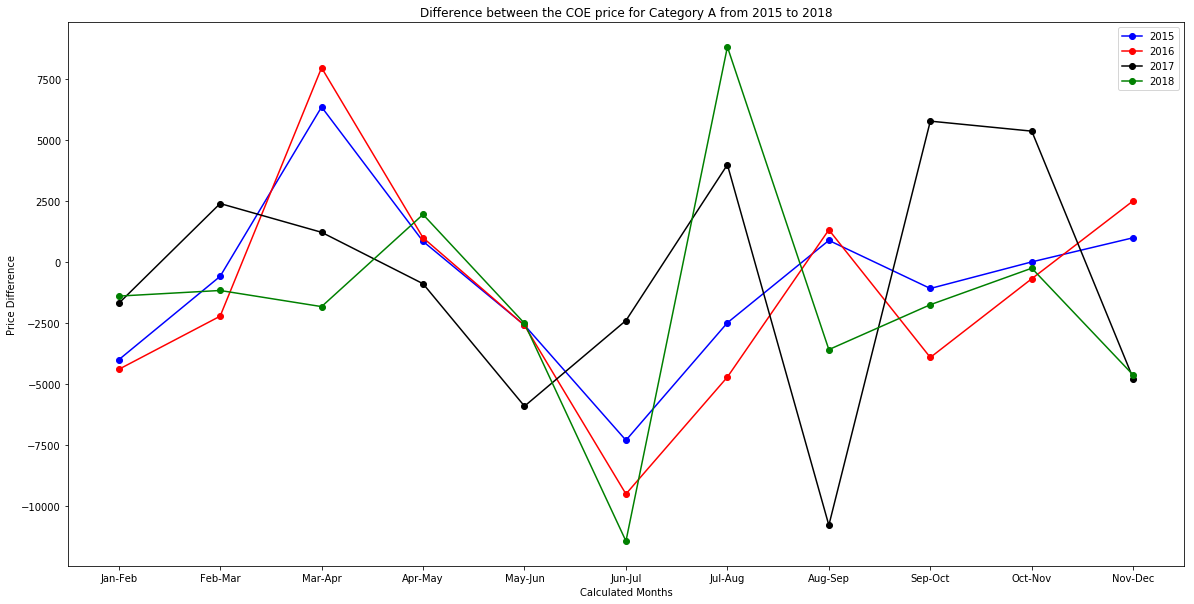

The average difference for 2015 is -820.09
The average difference for 2016 is -1389.82
The average difference for 2017 is -705.64
The average difference for 2018 is -1621.09


In [48]:
# Formatting of data in months

months = ["Jan-Feb", "Feb-Mar", "Mar-Apr", "Apr-May", "May-Jun", "Jun-Jul", 
          "Jul-Aug", "Aug-Sep", "Sep-Oct", "Oct-Nov", "Nov-Dec"]


#Plotting Of Line Graph

fig,ax = plt.subplots(figsize=(20,10))

ax.plot(months, cata_diff[0], 'bo-', label = year[0])
ax.plot(months, cata_diff[1], 'ro-', label = year[1])
ax.plot(months, cata_diff[2], 'ko-', label = year[2])
ax.plot(months, cata_diff[3], 'go-', label = year[3])

ax.set_title("Difference between the COE price for Category A from {} to {}".format(year[0], year[3]))
ax.set_xlabel('Calculated Months')
ax.set_ylabel('Price Difference')



plt.legend(loc='upper right')
plt.show()


def mean(value):
    return sum(value) / len(value)

for i in range(4):
    print("The average difference for {} is {:.2f}".format(year[i], mean(cata_diff[i])))

# Graph 2: The Price Range For Category B (1,600cc >) COE Over The Range Of 4 Years

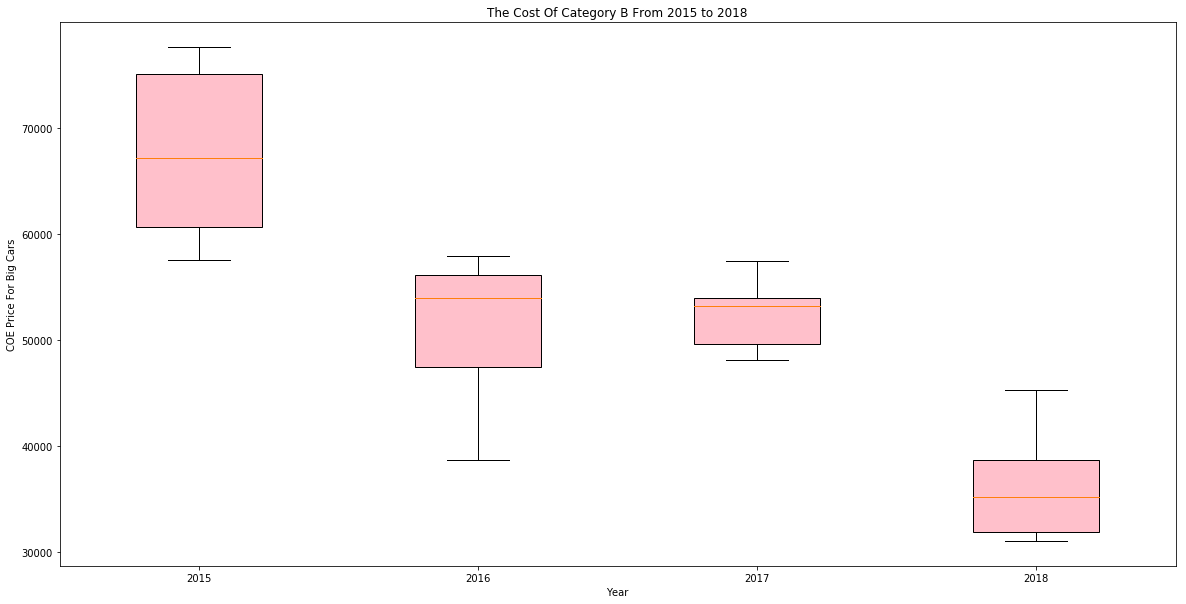

In 2015, the max is 77600.00, the min is 57501.00 and the mean is 67345.17

In 2016, the max is 57903.00, the min is 38610.00 and the mean is 51797.83

In 2017, the max is 57414.00, the min is 48109.00 and the mean is 52190.92

In 2018, the max is 45289.00, the min is 31000.00 and the mean is 35892.00


In [34]:
#Adding the data for Category B from the different years
data = [categories[0][1], categories[1][1], categories[2][1], categories[3][1]]
label = [year[0], year[1], year[2], year[3]]

#Plotting Of Box Plot
plt.figure(figsize=(20, 10))
bp = plt.boxplot(data ,labels = label ,patch_artist=True)

for patch in bp["boxes"]:
    patch.set(facecolor="pink")

    
plt.title("The Cost Of Category B From 2015 to 2018")
plt.xlabel("Year")
plt.ylabel("COE Price For Big Cars")
plt.show()

print("In {}, the max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(year[0], max(categories[0][1]), min(categories[0][1]), mean(categories[0][1])))
print("\nIn {}, the max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(year[1], max(categories[1][1]), min(categories[1][1]), mean(categories[1][1])))
print("\nIn {}, the max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(year[2], max(categories[2][1]), min(categories[2][1]), mean(categories[2][1])))
print("\nIn {}, the max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(year[3], max(categories[3][1]), min(categories[3][1]), mean(categories[3][1])))


# Graph 3: The relation between the bids received and the COE price for Category D (Motorbikes)

In [11]:
Cat_D_Premium = categories[0][4] + categories[1][4] + categories[2][4] + categories[3][4]

Cat_D_Bids = categories[0][5] + categories[1][5] + categories[2][5] + categories[3][5]

48
48


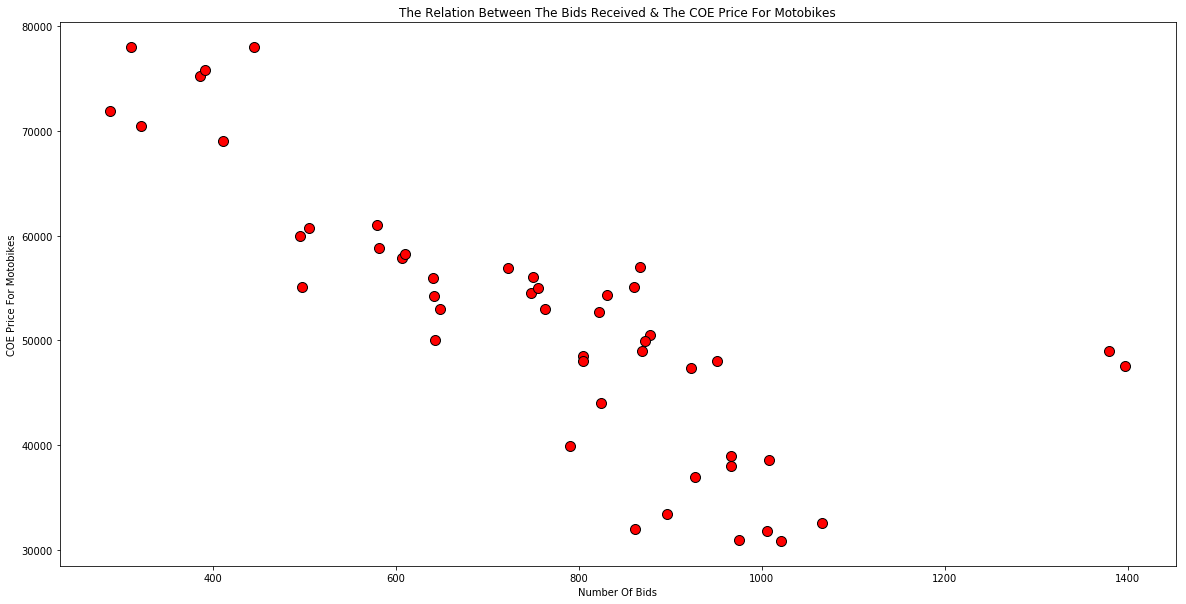

The max is 78004.00, the min is 30851.00 and the mean is 52166.77


In [35]:
#Combining The Price & Bids Received From The Different Years
Cat_D_Premium = categories[0][4] + categories[1][4] + categories[2][4] + categories[3][4]

Cat_D_Bids = categories[0][5] + categories[1][5] + categories[2][5] + categories[3][5]

#Plotting Of Scatterplot
plt.figure(figsize=(20, 10))
plt.scatter(Cat_D_Bids,Cat_D_Premium, s = 100, color = "red", edgecolor = "black")

plt.title("The Relation Between The Bids Received & The COE Price For Motobikes")
plt.xlabel("Number Of Bids")
plt.ylabel("COE Price For Motobikes")
plt.show()

print("The max is {:.2f}, the min is {:.2f} and the mean is {:.2f}"
      .format(max(Cat_D_Premium), min(Cat_D_Premium), mean(Cat_D_Premium)))

# Graph 4: The Number Of Driving Licences Over The Years

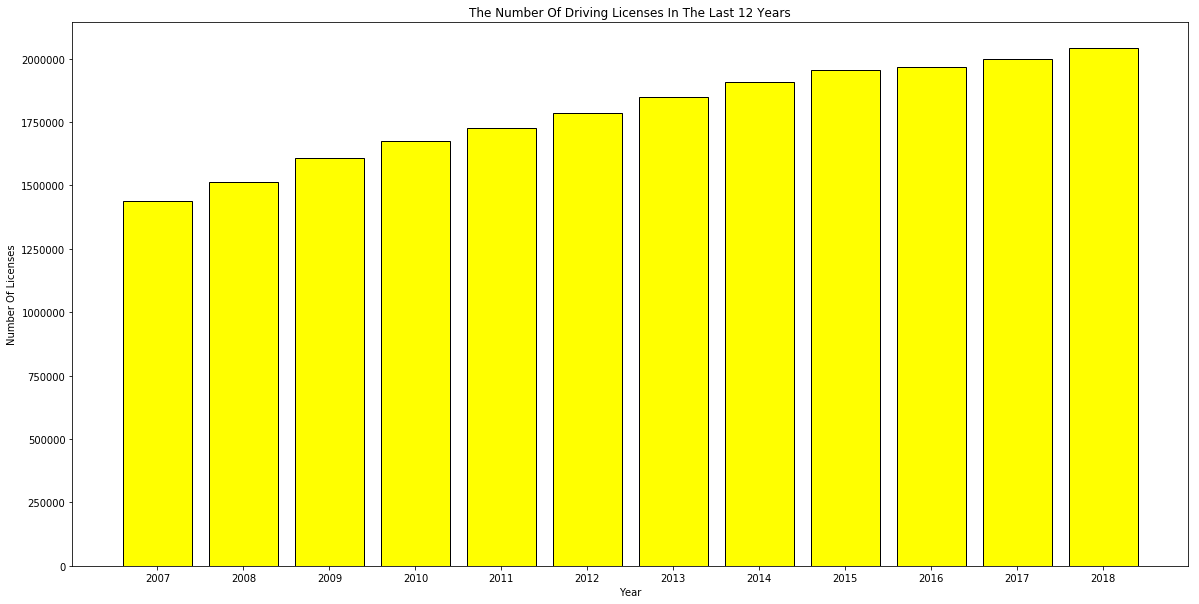

In year 2008, the difference was the highest of 94700
The max is 2041586, the min is 1437422 and the mean is 1788581


In [59]:
#Plotting Of Bar Charts
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(license['year'], license['qualified_driving_licence_holders'], color = "yellow", edgecolor = "black")

plt.title("The Number Of Driving Licenses In The Last 12 Years")
plt.xlabel("Year")
plt.ylabel("Number Of Licenses")
plt.show()

#Calculating The Difference 
driving_diff = []
for i in range(11):
    driving_diff.append(license['qualified_driving_licence_holders'][i + 1] - license['qualified_driving_licence_holders'][i])

print("In year {}, the difference was the highest of {}"
      .format((license['year'][driving_diff.index(max(driving_diff))]), max(driving_diff)))
print("The max is {:.0f}, the min is {:.0f} and the mean is {:.0f}"
      .format(max(license['qualified_driving_licence_holders']), min(license['qualified_driving_licence_holders']),
              mean(license['qualified_driving_licence_holders'])))

In [56]:
print(len(license['qualified_driving_licence_holders']))

driving_diff = []
for i in range(11):
    driving_diff.append(license['qualified_driving_licence_holders'][i + 1] - license['qualified_driving_licence_holders'][i])
print(driving_diff)
print(driving_diff.index(max(driving_diff)))
print(license['year'][driving_diff.index(max(driving_diff))])

12
[74329, 94700, 69906, 50123, 59930, 60340, 59561, 50024, 11284, 31878, 42089]
1
2008


# Graph 5: The Number Of Decks In Singapore's HDB Carparks

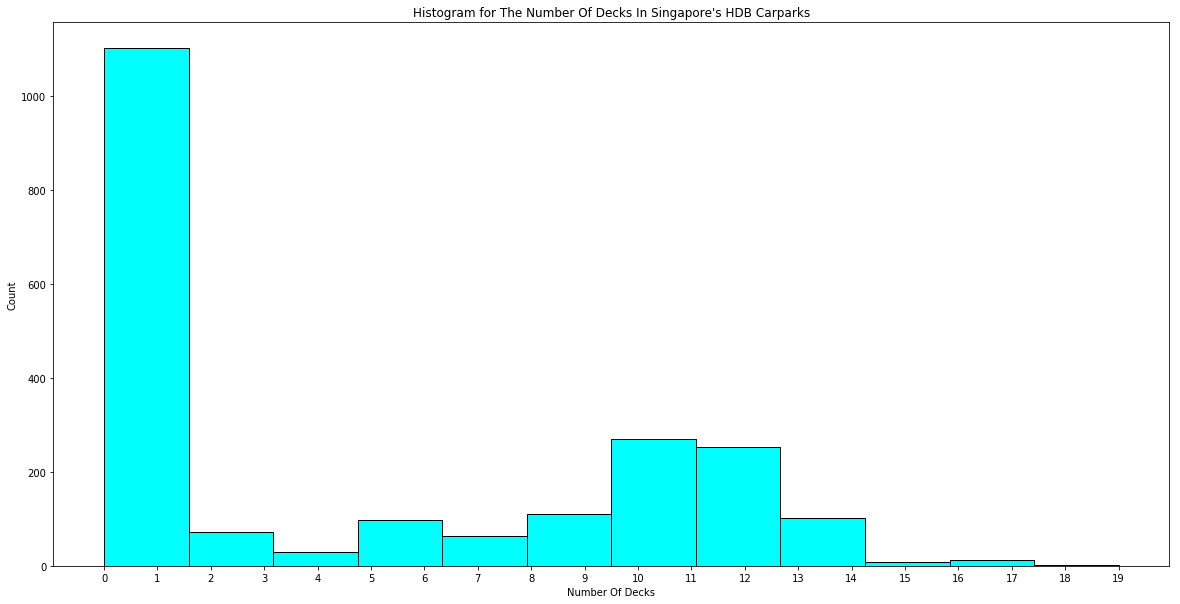

The highest number of decks is 19 with a count of 2, the least number of decks is 0 with a count of 1102 and the mean is 5


In [87]:
#Plotting Of Histogram
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(20))
(count, bins, color) = plt.hist(hdb['car_park_decks'], bins = 12, color = "cyan", edgecolor = "black")
plt.title("Histogram for The Number Of Decks In Singapore's HDB Carparks")
plt.xlabel("Number Of Decks")
plt.ylabel("Count")
plt.show()


print("The highest number of decks is {} with a count of {:.0f},"
      " the least number of decks is {} with a count of {:.0f} and the mean is {:.0f}"
      .format(max(hdb['car_park_decks']), count[-1], min(hdb['car_park_decks']), count[0], mean(hdb['car_park_decks'])))